In [73]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

Prior: (naturalness)
$$prior(\boldsymbol{a}|M,R)=(\frac{1}{\sqrt{2\pi}R})^{M+1}exp(-\frac{\boldsymbol{a}^2}{2R^2})

$$

In [74]:
def prior(a,M,R):
    constant = np.power(1 / (np.sqrt(2 * np.pi) * R), M + 1)
    exp_part = np.exp(-np.power(a, 2) / (2 * np.power(R, 2)))
    return constant * exp_part

generate data from function $g(x)=(\frac{1}{2}+tan(\frac{\pi}{2}x))^2$(which is precise value)  
with relative error of each 'experimental points' being constant $c$  
the number of mesh (or $x$ points) $N$

In [75]:
def g(x):
    return (0.5 + np.tan(np.pi * x / 2))**2

c=0.05
N=10

generate mesh $x$ within domain $D_1=[0,\frac{2}{\pi}]$, $N$ points  

In [76]:
x=np.linspace(0,2/np.pi,N)
print('x:')
print(x)

x:
[0.         0.07073553 0.14147106 0.21220659 0.28294212 0.35367765
 0.42441318 0.49514871 0.56588424 0.63661977]


eta is used to generate 'experiment data' (virtually), which follows a normal distribution, for each data point there is a corresponding $\sigma_{\eta_i}$    
$\sigma_{\eta}=1,\bar{\eta}=0$, $\eta \sim N(0,\sigma_\eta)$  
then generate 'data points' by $y(x_i)=g(x_i)(1+c\eta_i)$  
and $\sigma_i=cy(x_i)$

In [77]:
sigma_eta=1
eta=np.random.normal(0,sigma_eta,N)
y=g(x)*(1+c*eta)
sigma=c*y
#-----------------------------------
print('y:')
print(y)
print('sigma:')
print(sigma)

y:
[0.26021553 0.40105398 0.54362426 0.71661172 1.02783201 1.15310085
 1.71595044 2.20747166 2.87715686 3.98767719]
sigma:
[0.01301078 0.0200527  0.02718121 0.03583059 0.0513916  0.05765504
 0.08579752 0.11037358 0.14385784 0.19938386]


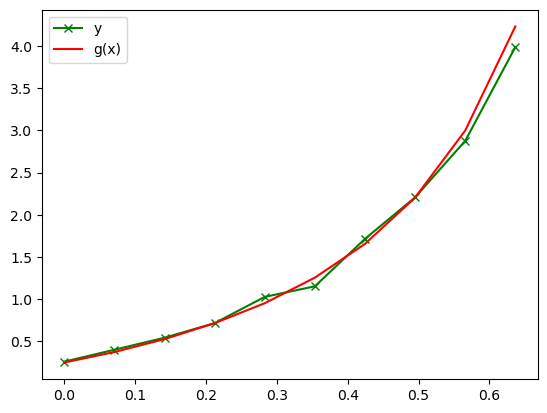

In [78]:
plt.plot(x,y,'gx-',label='y')
plt.plot(x,g(x),'r-',label='g(x)')
plt.legend()

plt.show()

order of polynominal $M$  
sample parameter($M+1$ rows, $N_{par}$ columns)  
$Npar$ parameters for each $a_i$

In [79]:
M=3
Npar=20
R=5
# params=[]
# for _ in range(M+1):
#     param_values=np.linspace(-5,5,Npar)
#     params.append(param_values)

# params = np.array(params)
def generate_samples(M, R, num_samples):
    # Generate samples from the Gaussian distribution
    samples = np.random.normal(0, R, size=(M+1, num_samples))
    
    return samples
params=generate_samples(M, R, Npar)
print('params:')
print(params)

params:
[[  5.87371945   4.30013191  -6.09725906   3.40650568  -1.39613843
   11.35461328   8.1139935   -7.05576986  -7.15978848   5.68482481
   -6.51430871 -11.22916156   4.96871685  -1.76325328   1.99232507
    8.33518233 -10.50084615   2.98375226  -3.54669552   6.03917748]
 [  4.02498225   8.50144242   8.61516472  11.76426135   2.52702911
    7.15647249  -0.10660971  -0.09472163   3.28119144   2.85456728
   -6.14040345   3.4240966   -6.10966734  -2.96725015   2.91326334
   -3.31490963 -11.37109493   6.63442704  -0.59798701   0.43160907]
 [ -1.40161879  -5.85568912  -1.77680463  -4.32853457   6.30134421
   -5.83340331   4.14615546   3.42660893 -11.30873538  -1.03889707
   -3.39386901   3.2124107    1.99588356  -0.66335737  -0.39334688
    7.66487159   1.60079367   1.36579962  -6.09098994   1.1970028 ]
 [ -3.41696249   6.08313232   2.16966518   6.06161129   6.94442368
    0.08511304  -5.52161917   5.14350647  -5.02224317   8.35159285
    2.27748124  -3.40075744   6.84324357  -3.707417

define polynominal function  
chi square: $\chi^2=\sum_{i} \frac{(y_i-f_i)^2}{\sigma_i} $  
likelihood: $p(D|\alpha)=exp(-\frac{1}{2}\chi^2)$

In [ ]:
#def polynomial function
def polynomial(para,x):
    return np.polyval(para,x)

#def chi-square function
def chi_square(y, f, sigma):
    return np.sum(((y-f)**2)/sigma**2)

#def likelyhood function
def likelihood(y, f, sigma):
    chi_sq = chi_square(y, f, sigma)
    return np.exp(-0.5 * chi_sq)
    

create an empty likelihood array

In [ ]:
likelihoods = np.zeros((Npar,) * (M+1))
print(likelihoods.shape)

Create a zero parameter array

In [ ]:

para=np.zeros(M+1)
print(para.shape)
print(para)

 遍历所有参数的组合  
 选择参数  
 计算模型的预测值  
 计算似然函数值  

In [ ]:

for index in itertools.product(range(Npar), repeat=M+1):
    
    for i in range(params.shape[0]):
        para[i]=params[i,index[i]]
   # para = params[:, index]
    
    f = polynomial(para, x)
    
    print(chi_square(y, f, sigma))
    likelihoods[index] = likelihood(y, f, sigma)

print(likelihoods.max()) 



